In [0]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift , estimate_bandwidth
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
iris = datasets.load_iris()

In [0]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [39]:
x.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [40]:
y.head()

,Target
0,0
1,0
2,0
3,0
4,0


Text(0.5, 1.0, 'Petal Length vs Petal Width')

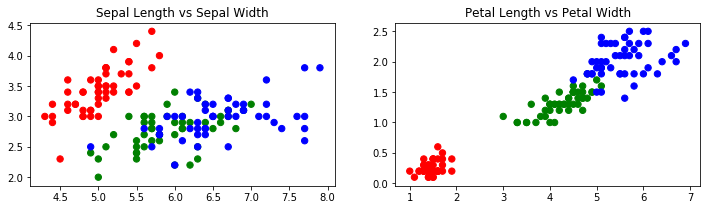

In [41]:
# Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

#Draw a Scatter plot for Sepal Length vs Sepal Width
#nrows=1, ncols=2, plot_number=1
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot
plt.subplot(1, 2, 1)

# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']], s=40)
plt.title('Sepal Length vs Sepal Width')

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y.Target], s=40)
plt.title('Petal Length vs Petal Width')

In [0]:
def plotMe(lables):
  #Start with a plot figure of size 12 units wide & 3 units tall
  plt.figure(figsize=(12,3))

  # Create an array of three colours, one for each species.
  colors = np.array(['red', 'green', 'blue'])

  # The fudge to reorder the cluster ids.
  predictedY = np.choose(lables, [1, 0, 2]).astype(np.int64)

  # Plot the classifications that we saw earlier between Petal Length and Petal Width
  plt.subplot(1, 2, 1)
  plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']], s=40)
  plt.title('Before classification')
 
  # Plot the classifications according to the model
  plt.subplot(1, 2, 2)
  plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY], s=40)
  plt.title("Model's classification")

# Kmeans :



In [42]:
KmeansModel = KMeans(n_clusters=3)
KmeansModel.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

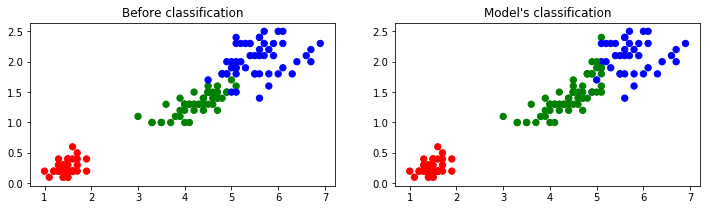

In [91]:
plotMe(KmeansModel.labels_)

# DBScan :

In [71]:
DBscanModel = DBSCAN(eps=1, min_samples=10)
DBscanModel.fit(x)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [72]:
DBscanModel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

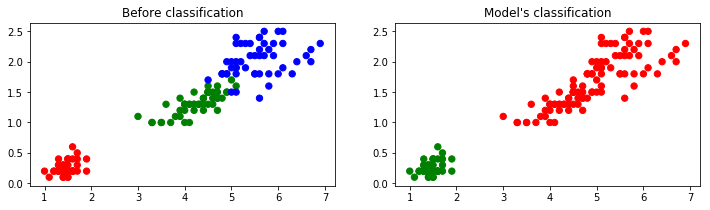

In [90]:
plotMe(DBscanModel.labels_)

# affinity propagation :


In [77]:
affinitypropagationModel = AffinityPropagation(preference=-50).fit(x)
affinitypropagationModel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

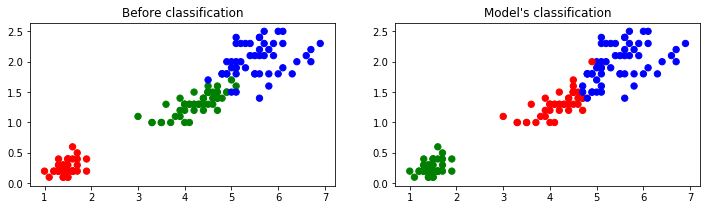

In [89]:
plotMe(affinitypropagationModel.labels_)

# MeanShift :

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


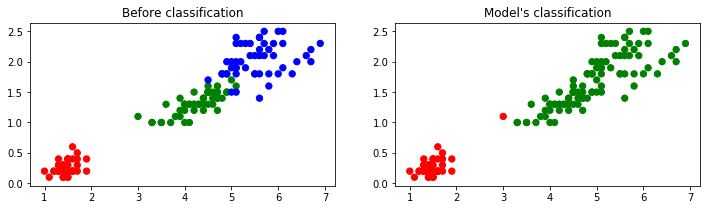

In [88]:
bandwidth = estimate_bandwidth(x, quantile=0.2, n_samples=100)
meanShiftModel = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(x)
print(meanShiftModel.labels_)
plotMe(meanShiftModel.labels_)

# AgglomerativeClustering:


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


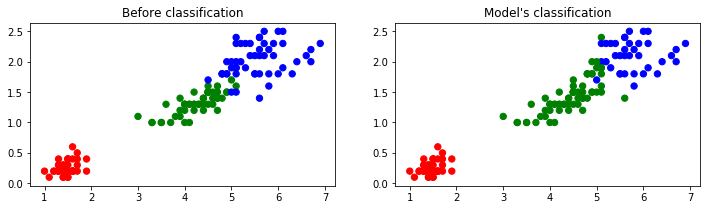

In [99]:
AgglomerativeClusteringModel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
AgglomerativeClusteringModel.fit_predict(x)
print(AgglomerativeClusteringModel.labels_)
plotMe(AgglomerativeClusteringModel.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


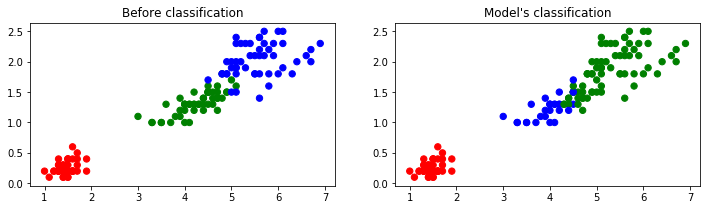

In [103]:
AgglomerativeClusteringModel2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
AgglomerativeClusteringModel2.fit_predict(x)
print(AgglomerativeClusteringModel2.labels_)
plotMe(AgglomerativeClusteringModel2.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


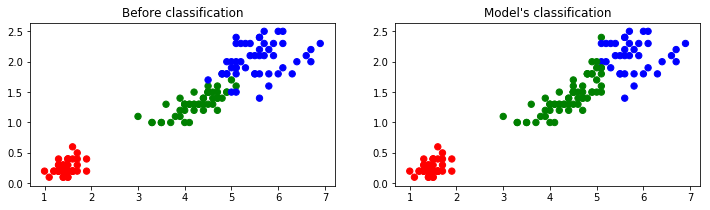

In [104]:
AgglomerativeClusteringModel3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
AgglomerativeClusteringModel3.fit_predict(x)
print(AgglomerativeClusteringModel3.labels_)
plotMe(AgglomerativeClusteringModel3.labels_)